<a href="https://colab.research.google.com/github/Bibhuti-MLAI/Customer-Segmentation/blob/main/Final_notebook_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Business Objective:**

***Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.***

***Customer segmentation has the potential to allow marketers to address each customer in the most effective way. Using the large amount of data available on customers (and potential customers), a customer segmentation analysis allows marketers to identify discrete groups of customers with a high degree of accuracy based on demographic, behavioral and other indicators.***

***Since the marketer’s goal is usually to maximize the value (revenue and/or profit) from each customer, it is critical to know in advance how any particular marketing action will influence the customer. Ideally, such “action-centric” customer segmentation will not focus on the short-term value of a marketing action, but rather the long-term customer lifetime value (CLV) impact that such a marketing action will have. Thus, it is necessary to group, or segment, customers according to their CLV.***

***Of course, it is always easier to make assumptions and use “gut feelings” to define rules which will segment customers into logical groupings, e.g., customers who came from a particular source, who live in a particular location or who bought a particular product/service. However, these high-level categorizations will seldom lead to the desired results***.

***It is obvious that some customers will spend more than others during their relationship with a company. The best customers will spend a lot for many years. Good customers will spend modestly over a long period of time, or will spend a lot over a short period of time. Others won’t spend too much and/or won’t stick around too long.***

***The right approach to segmentation analysis is to segment customers into groups based on predictions regarding their total future value to the company, with the goal of addressing each group (or individual) in the way most likely to maximize that future, or lifetime, value.***

# **Loading Dataset and Importing Modules**

In [96]:
#let's import the modules for EDA part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt
import math

import warnings
warnings.filterwarnings('ignore')

##Mount the drive and import the datset

In [97]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
#load the data set from drive
customer_df=pd.read_excel("/content/drive/MyDrive/Customer Segmentation - Bibhuti Bhusan Sahu/Online Retail.xlsx")

# **Understand More About The Data**

##summary of data

In [99]:
# Viewing the data of top 5 rows to take a glimps of the data
customer_df.head()

InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]

In [100]:
# View the data of bottom 5 rows to take a glimps of the data
customer_df.tail()

InvoiceNo StockCode  ... CustomerID  Country
541904    581587     22613  ...    12680.0   France
541905    581587     22899  ...    12680.0   France
541906    581587     23254  ...    12680.0   France
541907    581587     23255  ...    12680.0   France
541908    581587     22138  ...    12680.0   France

[5 rows x 8 columns]

In [101]:
#Getting the shape of dataset with rows and columns
print(customer_df.shape)

(541909, 8)


In [102]:
#Getting all the columns
print("Features of the dataset:")
customer_df.columns

Features of the dataset:


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [103]:
#check details about the data set
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [104]:
#print the unique value
customer_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [105]:
#Looking for the description of the dataset to get insights of the data
customer_df.describe().T

count          mean          std  ...       50%       75%      max
Quantity    541909.0      9.552250   218.081158  ...      3.00     10.00  80995.0
UnitPrice   541909.0      4.611114    96.759853  ...      2.08      4.13  38970.0
CustomerID  406829.0  15287.690570  1713.600303  ...  15152.00  16791.00  18287.0

[3 rows x 8 columns]

##Features description

* ### **InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.**
* ### **StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.**
* ### **Description: Product (item) name. Nominal.**
* ### **Quantity: The quantities of each product (item) per transaction. Numeric.**
* ### **InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated**.
* ### **UnitPrice: Unit price. Numeric, Product price per unit in sterling.**
* ### **CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.**
* ### **Country: Country name. Nominal, the name of the country where each customer resides.**

# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first*** 

##Missing values

In [106]:
#check for count of missing values in each column.
customer_df.isna().sum()
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

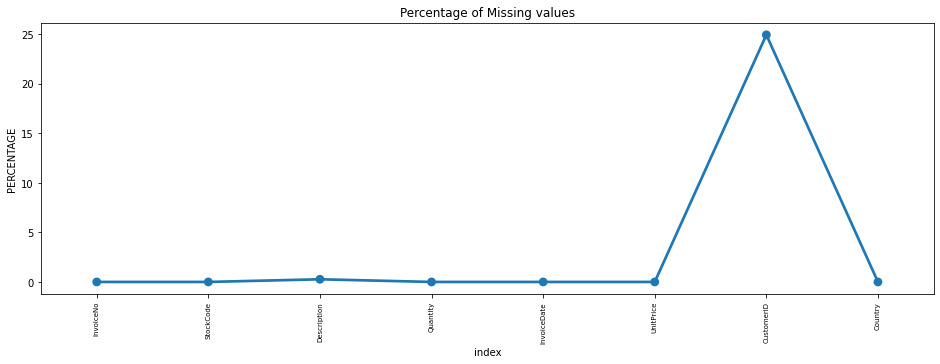

In [107]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((customer_df.isnull().sum())*100/customer_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

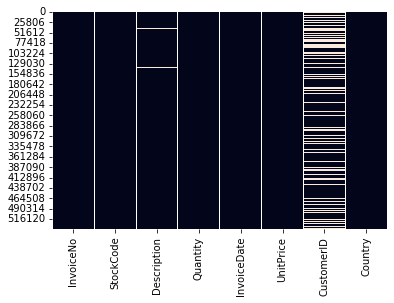

In [108]:
# Checking Null Value by plotting Heatmap
sns.heatmap(customer_df.isnull(), cbar=False)

In [109]:
customer_df['Description'].isnull().sum()

1454

In [110]:
customer_df['CustomerID'].isnull().sum()

135080

* **There is some null value present in our dataset like in   CustomerID and  Description**

In [111]:
customer_df.dropna(inplace=True)

In [112]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [113]:
customer_df.shape

(406829, 8)

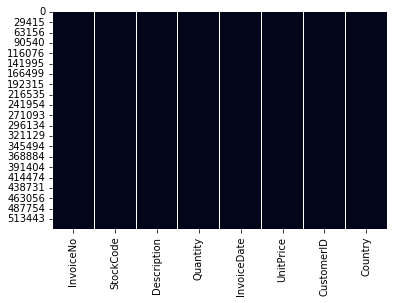

In [114]:
# Checking Null Value by plotting Heatmap
sns.heatmap(customer_df.isnull(), cbar=False)

**After removeing null value in our dataset .it reduces to (406829, 8)**

##Duplicate values

**Why is it important to remove duplicate records from my data?** 
* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.**

In [115]:
# Checking Duplicate Values
value=len(customer_df[customer_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  5225


In [116]:
customer_df[customer_df.duplicated()]

InvoiceNo StockCode  ... CustomerID         Country
517       536409     21866  ...    17908.0  United Kingdom
527       536409     22866  ...    17908.0  United Kingdom
537       536409     22900  ...    17908.0  United Kingdom
539       536409     22111  ...    17908.0  United Kingdom
555       536412     22327  ...    17920.0  United Kingdom
...          ...       ...  ...        ...             ...
541675    581538     22068  ...    14446.0  United Kingdom
541689    581538     23318  ...    14446.0  United Kingdom
541692    581538     22992  ...    14446.0  United Kingdom
541699    581538     22694  ...    14446.0  United Kingdom
541701    581538     23343  ...    14446.0  United Kingdom

[5225 rows x 8 columns]

In [117]:
### Dropping Duplicate Rows
customer_df=customer_df.drop_duplicates()
len(customer_df[customer_df.duplicated()])

0

In [118]:
customer_df.shape

(401604, 8)

### **we have to drop some  InvoiceNo  which are starts with 'c' because 'c', it indicates a cancellation**

In [119]:
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')

In [120]:
# checking invoice no.
customer_df[customer_df['InvoiceNo'].str.contains('C')]

InvoiceNo StockCode  ... CustomerID         Country
141      C536379         D  ...    14527.0  United Kingdom
154      C536383    35004C  ...    15311.0  United Kingdom
235      C536391     22556  ...    17548.0  United Kingdom
236      C536391     21984  ...    17548.0  United Kingdom
237      C536391     21983  ...    17548.0  United Kingdom
...          ...       ...  ...        ...             ...
540449   C581490     23144  ...    14397.0  United Kingdom
541541   C581499         M  ...    15498.0  United Kingdom
541715   C581568     21258  ...    15311.0  United Kingdom
541716   C581569     84978  ...    17315.0  United Kingdom
541717   C581569     20979  ...    17315.0  United Kingdom

[8872 rows x 8 columns]

In [121]:
customer_df=customer_df[~customer_df['InvoiceNo'].str.contains('C')]


In [122]:
customer_df.shape

(392732, 8)

In [123]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### **convert invoice Data column into 'year','month','day','hour','minute','second'**

In [124]:
customer_df['InvoiceDate_year'] = customer_df['InvoiceDate'].dt.year
customer_df['InvoiceDate_month'] = customer_df['InvoiceDate'].dt.month
customer_df['InvoiceDate_day'] = customer_df['InvoiceDate'].dt.day
customer_df['InvoiceDate_hour'] = customer_df['InvoiceDate'].dt.hour
customer_df['InvoiceDate_minute'] = customer_df['InvoiceDate'].dt.minute
customer_df['InvoiceDate_second'] = customer_df['InvoiceDate'].dt.second


In [125]:
print("Columns and data types")
pd.DataFrame(customer_df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


dtype
InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                 float64
Country                     object
InvoiceDate_year             int64
InvoiceDate_month            int64
InvoiceDate_day              int64
InvoiceDate_hour             int64
InvoiceDate_minute           int64
InvoiceDate_second           int64

In [126]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [127]:
customer_df.shape

(392732, 14)

# **Exploratory Data Analysis**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## **First thing first - The customers**

We have a certain amount of rows. Let us check if each row has a single customer or not. If not than how many customer ids we have.

In [128]:
# let us see the unique ids of customers
print('The no. of customers = ',customer_df['CustomerID'].nunique())

The no. of customers =  4339


So we have around 392732 rows but only 4339 customers. Let us now see who is most active customer.

In [129]:
# finding most active customer
active_customers=pd.DataFrame(customer_df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)
active_customers

CustomerID  Count
0        17841.0   7676
1        14911.0   5672
2        14096.0   5111
3        12748.0   4413
4        14606.0   2677
...          ...    ...
4334     13099.0      1
4335     17715.0      1
4336     13017.0      1
4337     16073.0      1
4338     16093.0      1

[4339 rows x 2 columns]

In [130]:
# top 5
active_customers.head()

CustomerID  Count
0     17841.0   7676
1     14911.0   5672
2     14096.0   5111
3     12748.0   4413
4     14606.0   2677

Text(0, 0.5, 'Count')

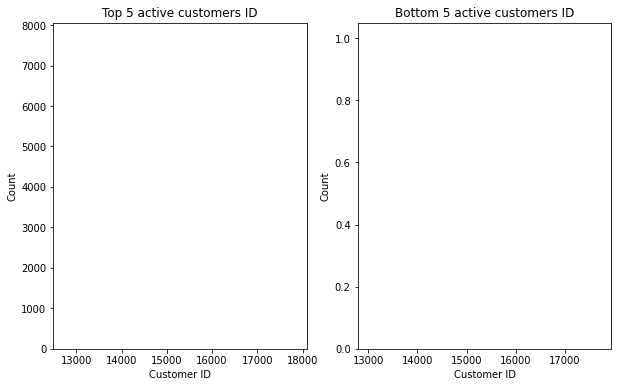

In [131]:
# visulizing
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.bar(active_customers['CustomerID'][-5:],active_customers['Count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

The top 5 most active customers that have been regularly purchasing are having ids 17841, 14911, 14096, 12748, 14606. These customers can be considered as special customeres because it is very likely that they would buy more often.

## **Analysis of  Categorical Features**

In [132]:
categorical_columns=list(customer_df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

##**Analysis of Description Variable**

In [133]:
Description_df=customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)

In [134]:
Description_df.head()

Description_Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2016
1            REGENCY CAKESTAND 3 TIER   1714
2             JUMBO BAG RED RETROSPOT   1615
3       ASSORTED COLOUR BIRD ORNAMENT   1395
4                       PARTY BUNTING   1390

In [135]:
Description_df.tail()

Description_Name  Count
3872                  WRAP  PINK FLOCK      1
3873  AMBER GLASS/SHELL/PEARL NECKLACE      1
3874         HEN HOUSE W CHICK IN NEST      1
3875  SET/3 FLORAL GARDEN TOOLS IN BAG      1
3876             LADLE LOVE HEART RED       1

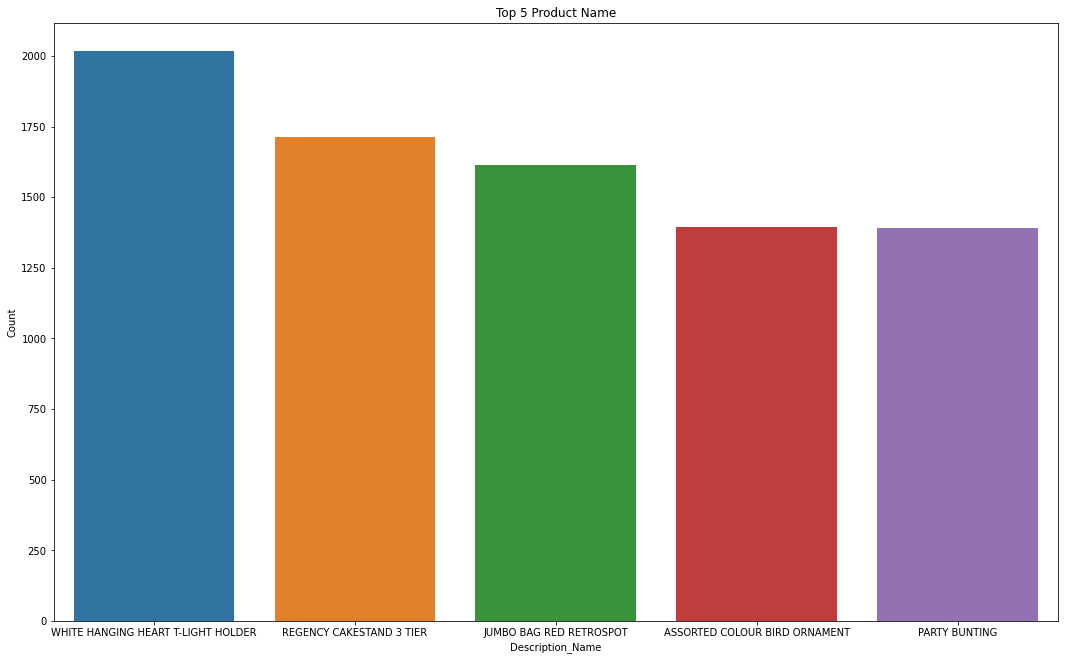

In [136]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

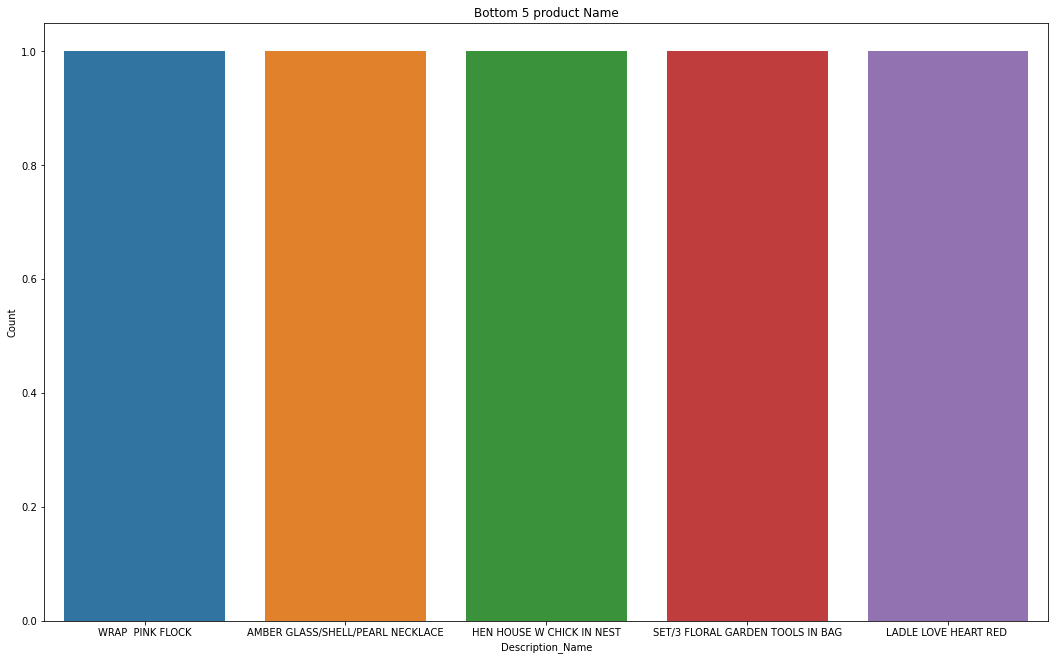

In [137]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

##**Analysis of StockCode Variable**

In [138]:
StockCode_df=customer_df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)

In [139]:
StockCode_df.head()

StockCode_Name  Count
0         85123A   2023
1          22423   1714
2         85099B   1615
3          84879   1395
4          47566   1390

In [140]:
StockCode_df.tail()

StockCode_Name  Count
3660         85031B      1
3661         90182C      1
3662         16169N      1
3663          90168      1
3664         90202A      1

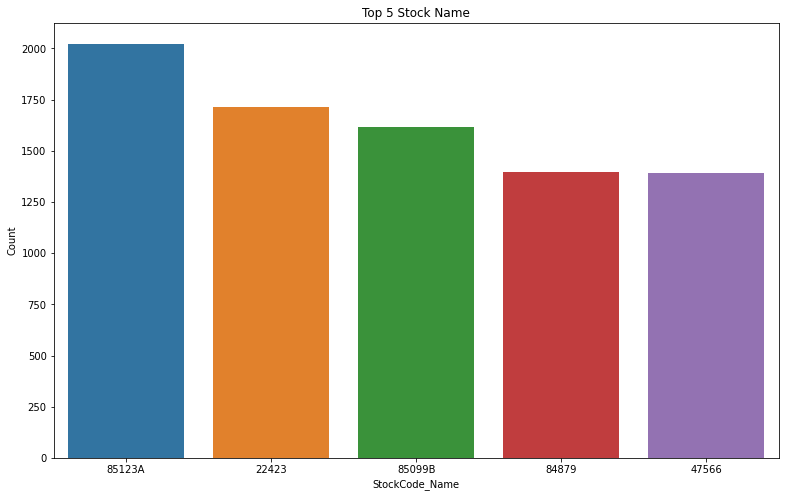

In [141]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

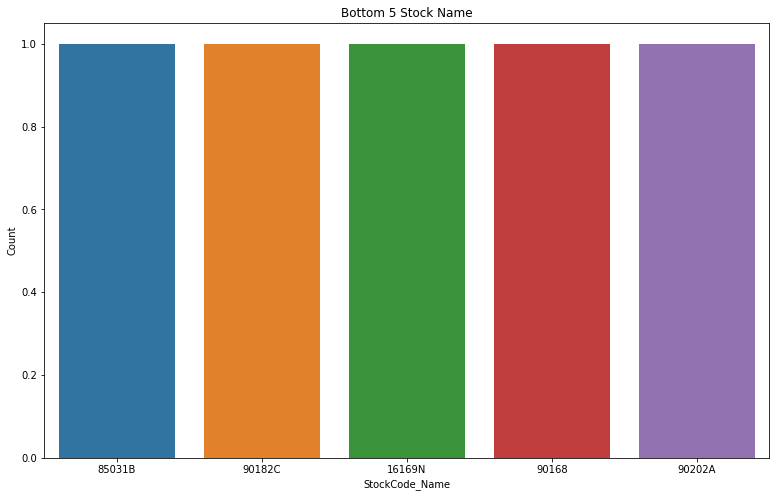

In [142]:
plt.figure(figsize=(13,8))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])

##**Analysis of country Variable**

In [143]:
country_df=customer_df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)

In [144]:
country_df.head()

Country_Name   Count
0  United Kingdom  349227
1         Germany    9027
2          France    8327
3            EIRE    7228
4           Spain    2480

In [145]:
country_df.tail()

Country_Name  Count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9

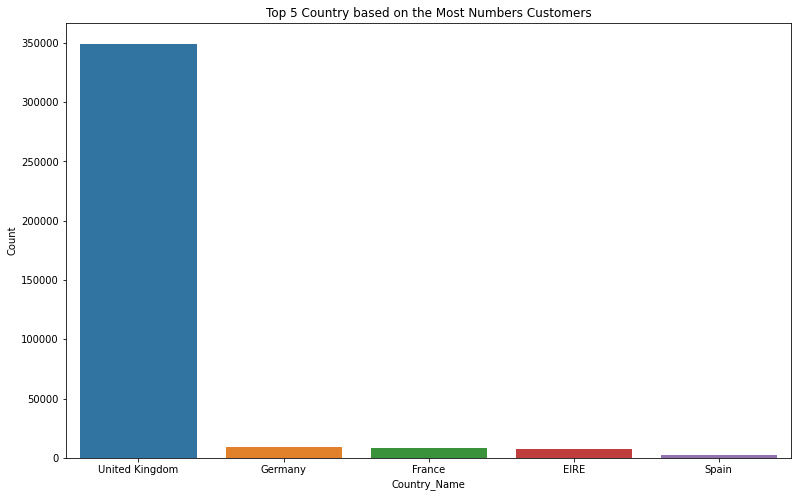

In [146]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

**From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**

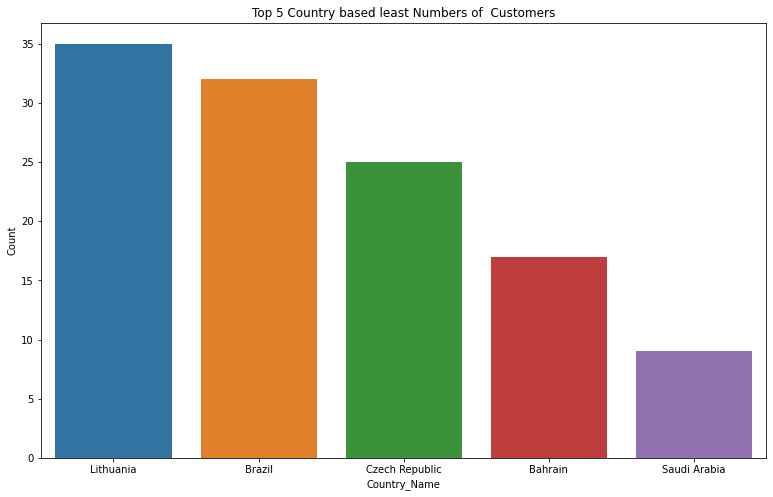

In [147]:
plt.figure(figsize=(13,8))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain  and Saudi Arabia**

In [148]:
customer_df[customer_df['Country']=='United Kingdom']

InvoiceNo StockCode  ... InvoiceDate_minute  InvoiceDate_second
0         536365    85123A  ...                 26                   0
1         536365     71053  ...                 26                   0
2         536365    84406B  ...                 26                   0
3         536365    84029G  ...                 26                   0
4         536365    84029E  ...                 26                   0
...          ...       ...  ...                ...                 ...
541889    581585     22466  ...                 31                   0
541890    581586     22061  ...                 49                   0
541891    581586     23275  ...                 49                   0
541892    581586     21217  ...                 49                   0
541893    581586     20685  ...                 49                   0

[349227 rows x 14 columns]

In [149]:
customer_df[customer_df['Country']=='Saudi Arabia']

InvoiceNo StockCode  ... InvoiceDate_minute  InvoiceDate_second
100810    544838     22915  ...                 34                   0
100811    544838     22363  ...                 34                   0
100812    544838     22362  ...                 34                   0
100813    544838     22361  ...                 34                   0
100814    544838     22553  ...                 34                   0
100815    544838     22555  ...                 34                   0
100816    544838     22556  ...                 34                   0
100817    544838     20781  ...                 34                   0
100818    544838     22969  ...                 34                   0

[9 rows x 14 columns]

## **Analysis Numeric Features**

In [150]:
numerical_columns=list(customer_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features


Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

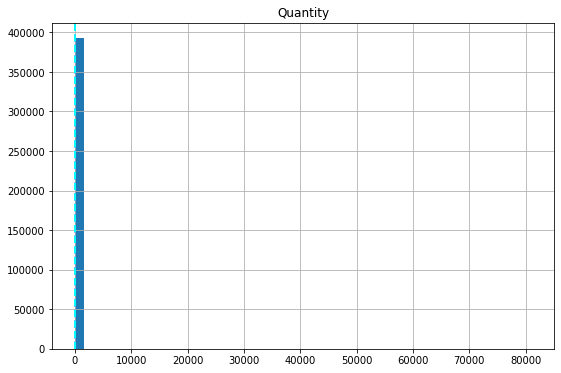

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


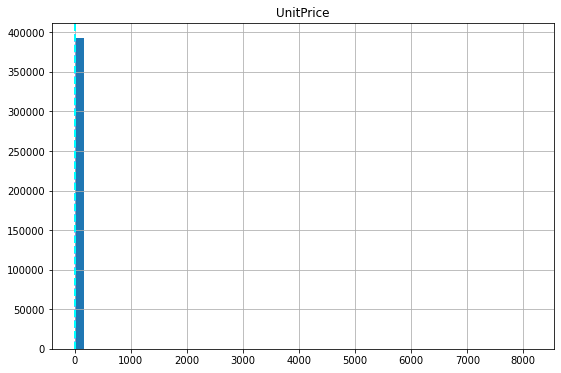

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


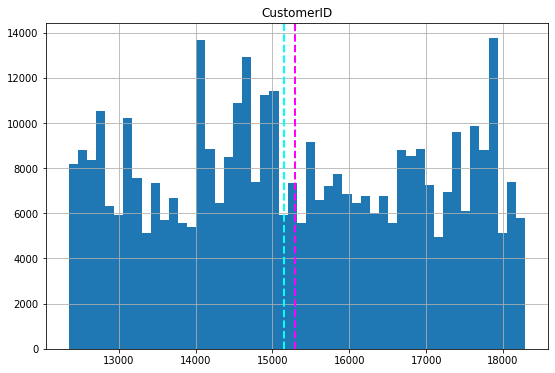

Skewness : 0.0301953601721347
Kurtosis : -1.1807001644923933


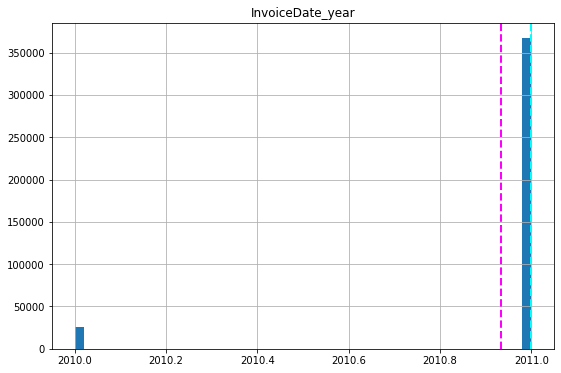

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


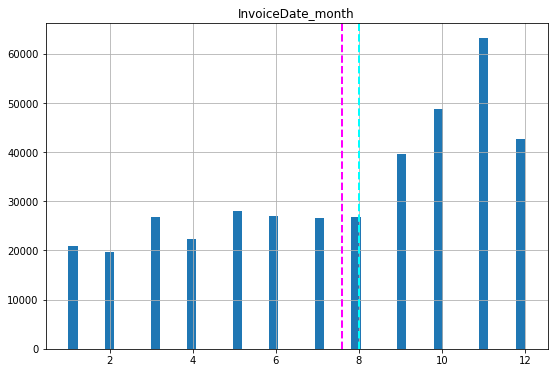

Skewness : -0.44039649840565165
Kurtosis : -1.0764781956797629


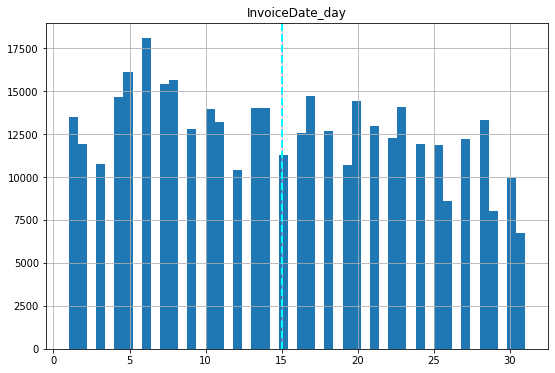

Skewness : 0.11441497180759913
Kurtosis : -1.1716768778411122


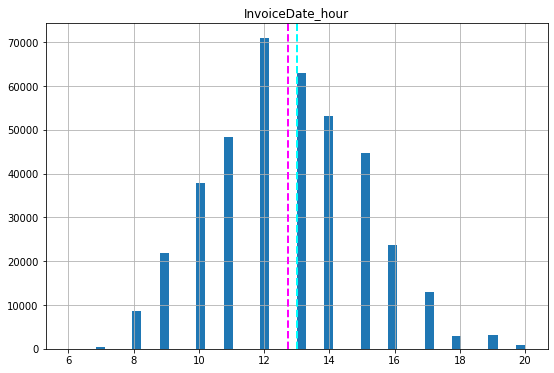

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


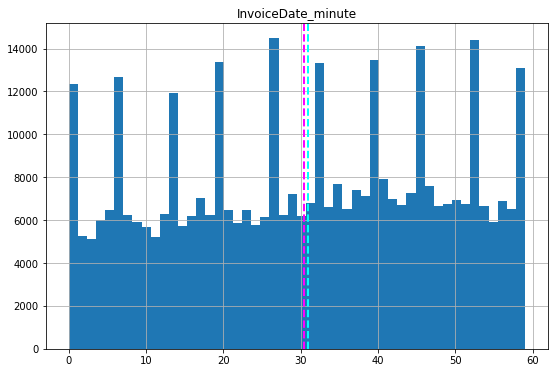

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


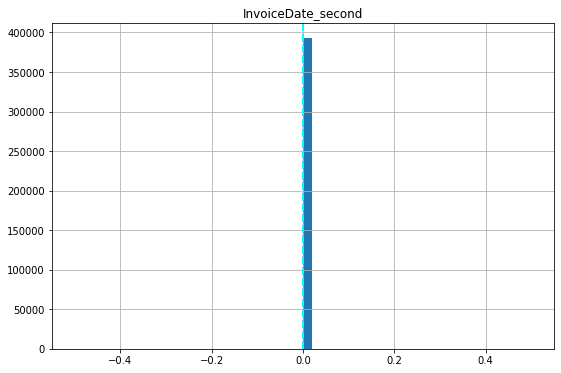

Skewness : 0
Kurtosis : 0


In [151]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer_df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer_df[col].skew())
  print( "Kurtosis :",customer_df[col].kurt())

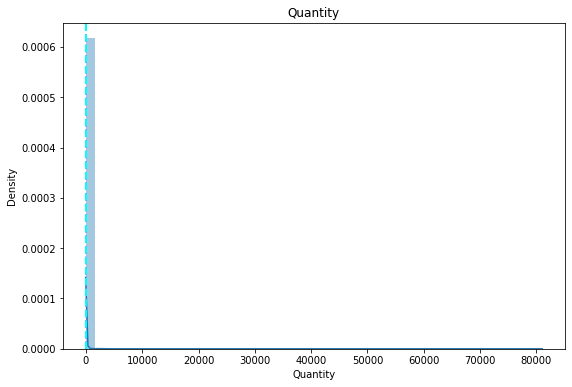

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


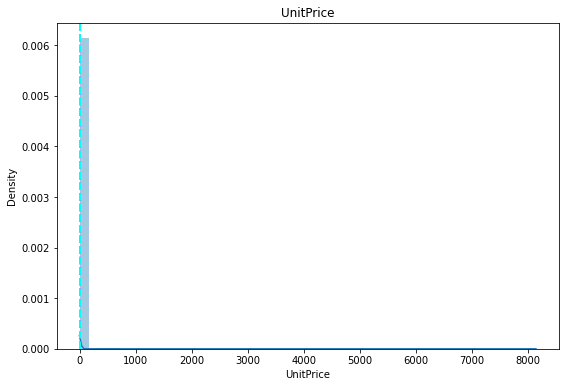

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


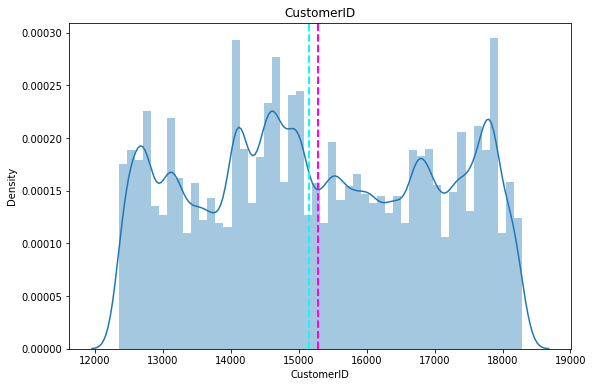

Skewness : 0.0301953601721347
Kurtosis : -1.1807001644923933


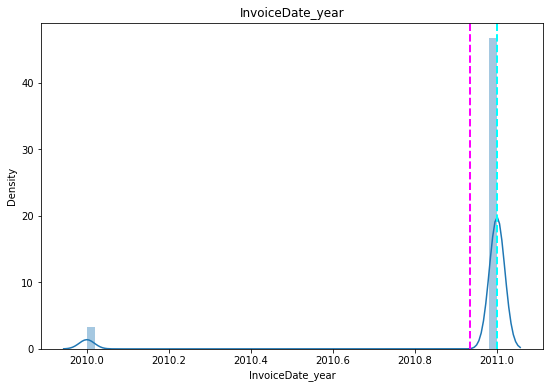

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


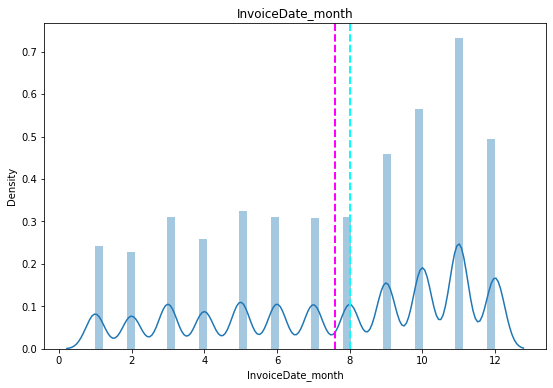

Skewness : -0.44039649840565165
Kurtosis : -1.0764781956797629


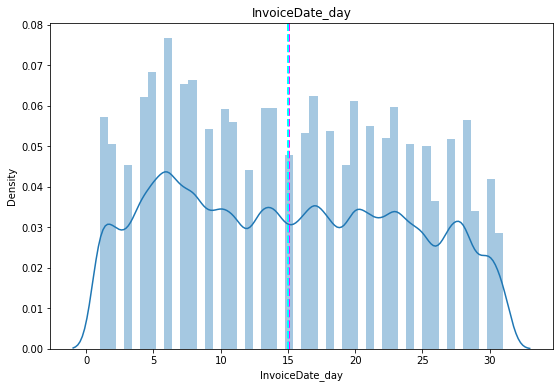

Skewness : 0.11441497180759913
Kurtosis : -1.1716768778411122


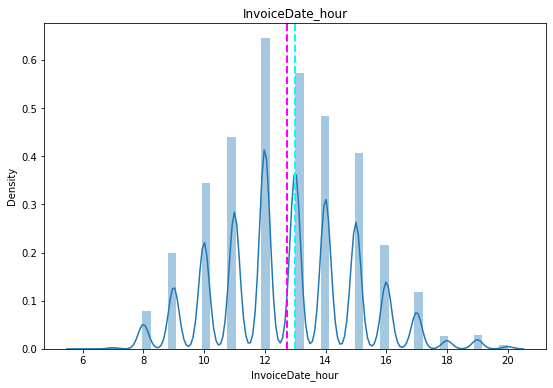

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


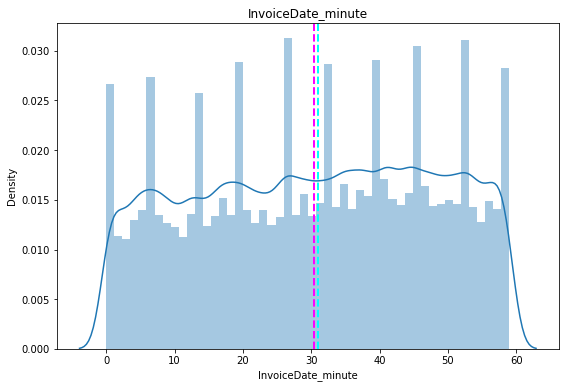

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


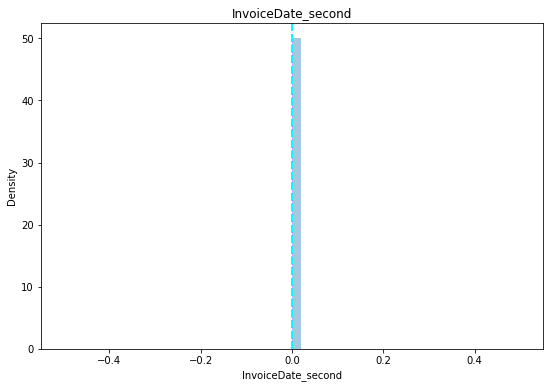

Skewness : 0
Kurtosis : 0


In [152]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer_df[col])
  sns.distplot(customer_df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer_df[col].skew())
  print( "Kurtosis :",customer_df[col].kurt())

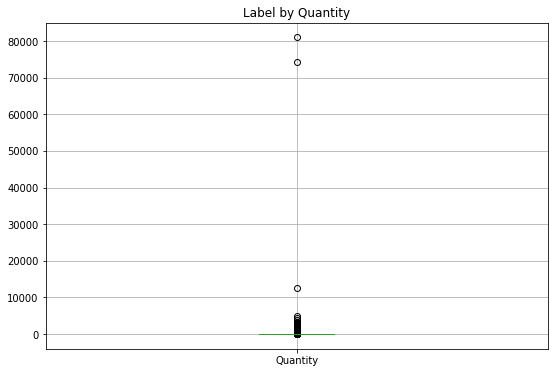

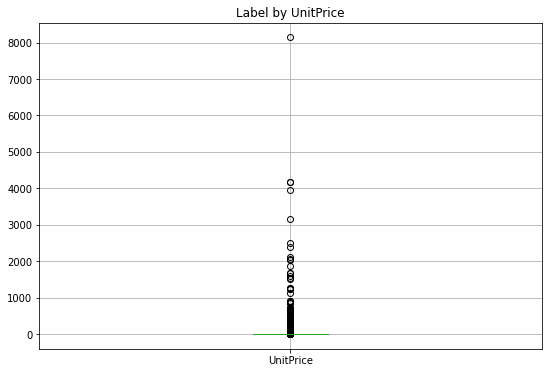

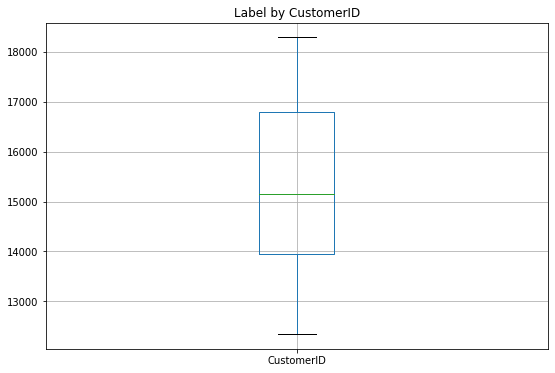

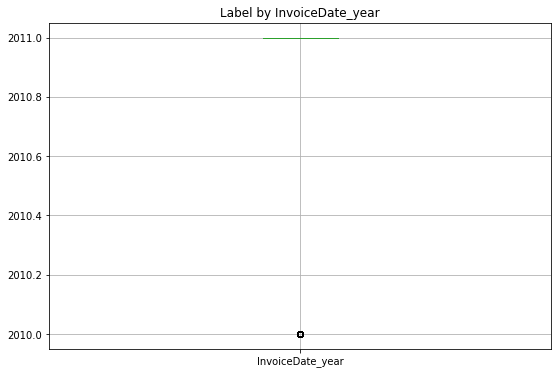

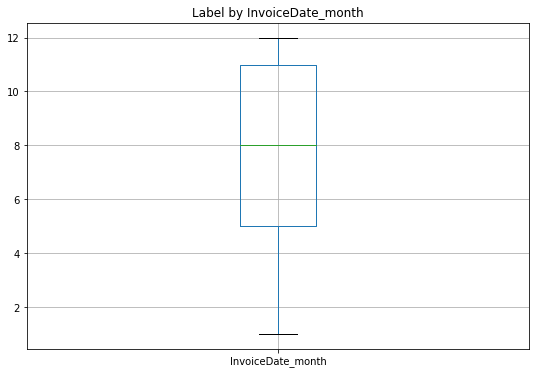

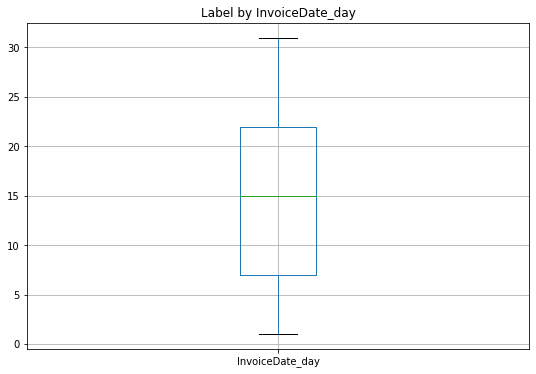

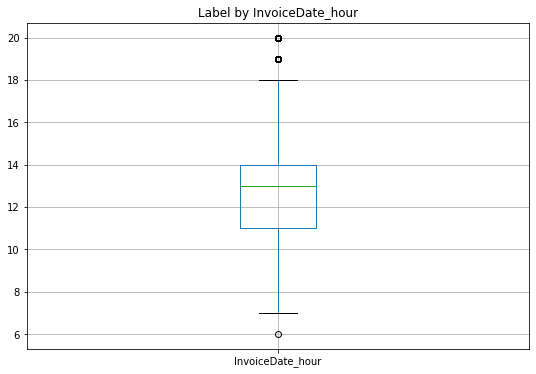

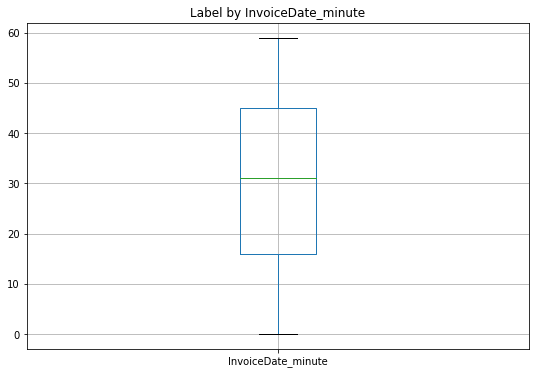

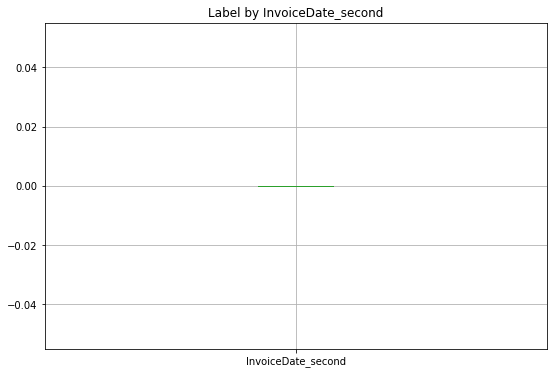

In [153]:
# plot a boxplot for the label by each numerical feature  

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    customer_df.boxplot(col)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

##**Correlation**

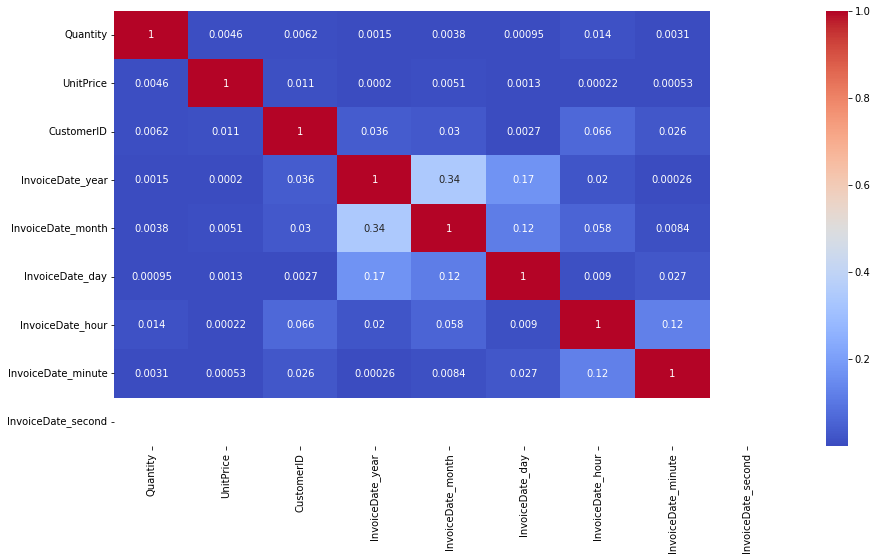

In [154]:
## Correlation
plt.figure(figsize=(15,8))
correlation=customer_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#**Feature engineering**

**Create a new features Day from Invoicedate**

In [155]:
customer_df['Day']=customer_df['InvoiceDate'].dt.day_name()

**Create a new features TotalAmount from form product of Quantity and Unitprice**

In [156]:
customer_df['TotalAmount']=customer_df['Quantity']*customer_df['UnitPrice']

In [157]:
customer_df.head()

InvoiceNo StockCode  ...        Day  TotalAmount
0    536365    85123A  ...  Wednesday        15.30
1    536365     71053  ...  Wednesday        20.34
2    536365    84406B  ...  Wednesday        22.00
3    536365    84029G  ...  Wednesday        20.34
4    536365    84029E  ...  Wednesday        20.34

[5 rows x 16 columns]

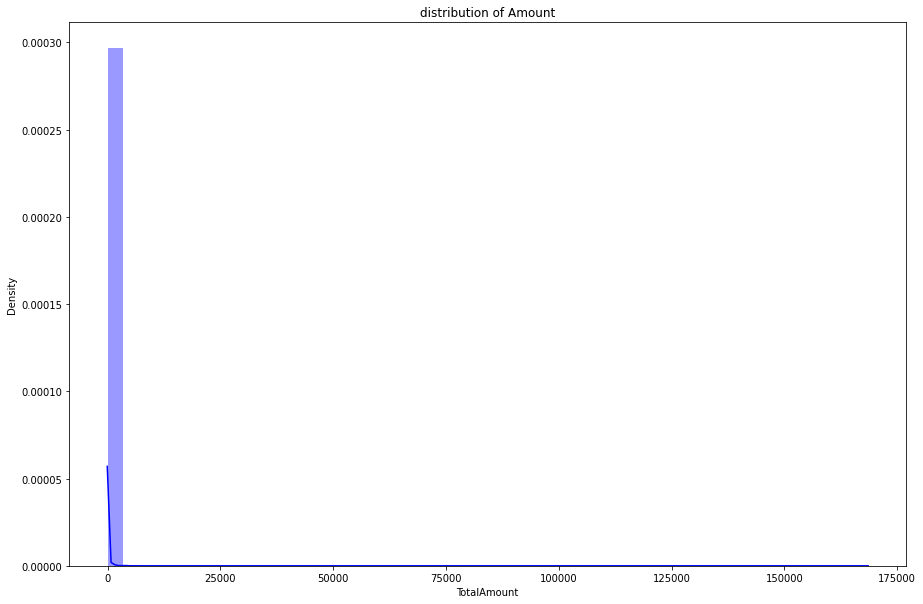

In [158]:
plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(customer_df['TotalAmount'],color="B")

In [159]:
customer_df['TotalAmount'].describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

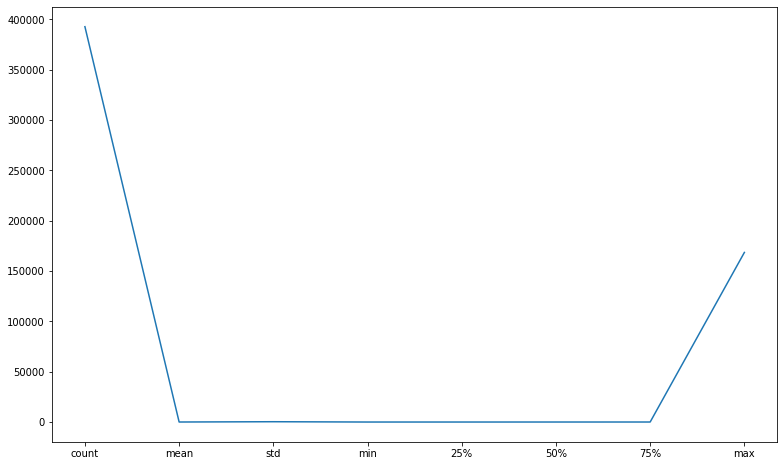

In [160]:
plt.figure(figsize=(13,8))
customer_df['TotalAmount'].describe().plot()

In [161]:
day_df=customer_df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  79260
1  Wednesday  68043
2    Tuesday  65747
3     Monday  64237
4     Sunday  61214
5     Friday  54231

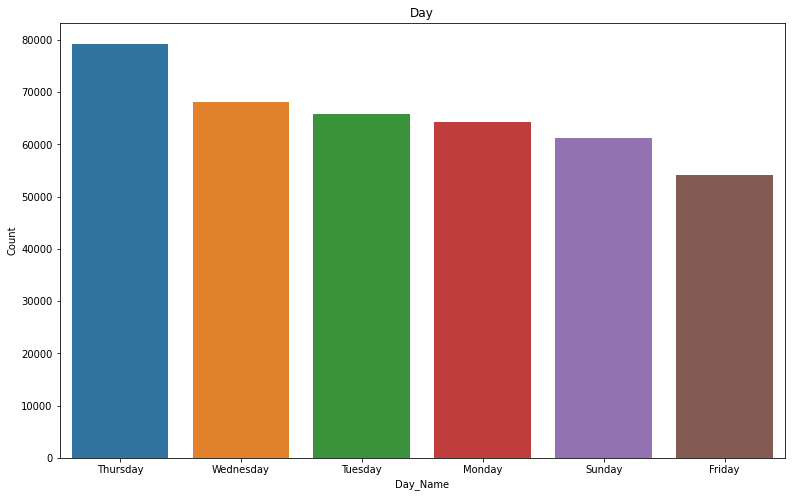

In [162]:
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

* **Most of the customers have purches the items in Thursday ,Wednesday and Tuesday**

In [163]:
month_df=customer_df['InvoiceDate_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'InvoiceDate_month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0           11  63182
1           10  48796
2           12  42699
3            9  39671
4            5  28075
5            6  26926
6            3  26872
7            8  26796
8            7  26582
9            4  22435
10           1  20991
11           2  19707

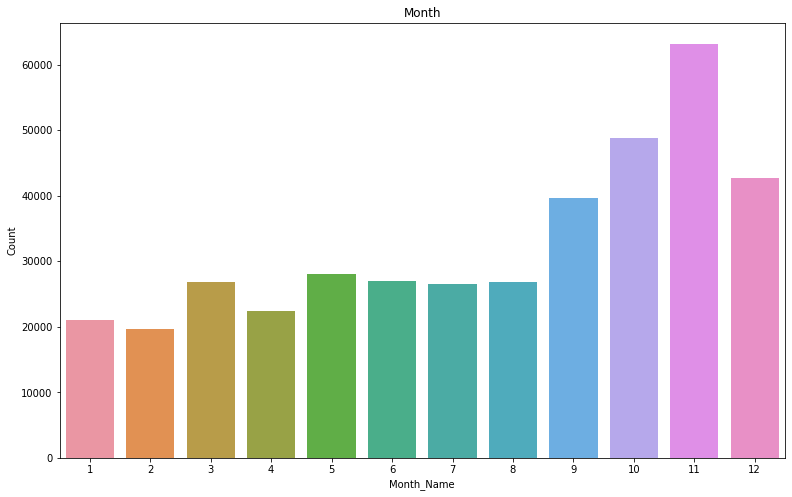

In [164]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

* **most numbers of customers have purches the gifts in the month of November ,October and December September**

* **less numbers of customers have purches the gifts in the month of April ,january and February**

In [165]:
hour_df=customer_df['InvoiceDate_hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'InvoiceDate_hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  70942
1          13  63024
2          14  53260
3          11  48373
4          15  44793
5          10  37775
6          16  23719
7           9  21928
8          17  12942
9           8   8688
10         19   3234
11         18   2896
12         20    778
13          7    379
14          6      1

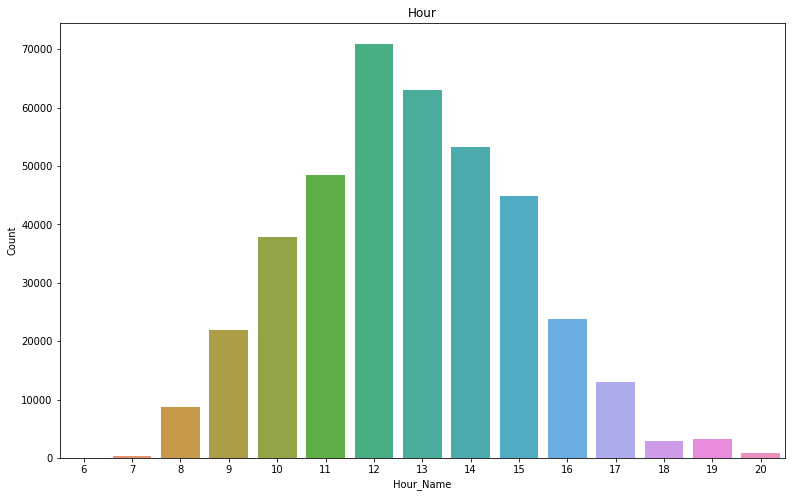

In [166]:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

* **From this graph we can see that in AfterNone Time most of the customers have purches the item.**

In [167]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [168]:
customer_df['Time_type']=customer_df['InvoiceDate_hour'].apply(time_type)

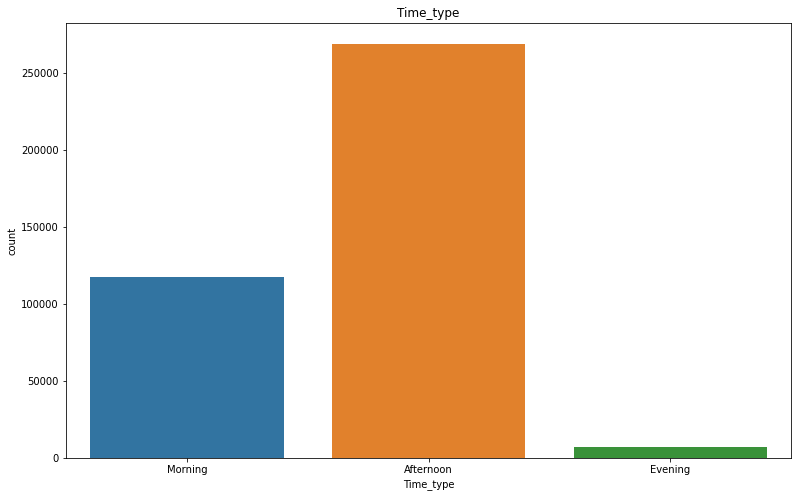

In [169]:
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=customer_df)

* **Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening**

# **Creating RFM model**

**Before applying any clustering algorithms it is always necessary to determine various quantitative factors on which the algorithm will perform segmentation. Examples of these would be features such as amount spend, activeness of the customer, their last visit, etc.** 

**RFM model which stands for Recency, Frequency, and Monetary is one of such steps in which we determine the recency - days to last visit, frequency - how actively the customer repurchases and monetary - total expenditure of the customer, for each customer. There are other steps too in which we divide each of these features accordingly and calculate a score for each customer. However, this approach doesnot require machine learning algorithms as segmentation can be done manually. Therefore we will skip the second step and directly use the rfm features and feed it to clustering algorithms.**

* **Recency = Latest Date - Last Inovice Data,**
* **Frequency = count of invoice no. of transaction(s),** 
* **Monetary = Sum of Total Amount for each customer**

In [170]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [171]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

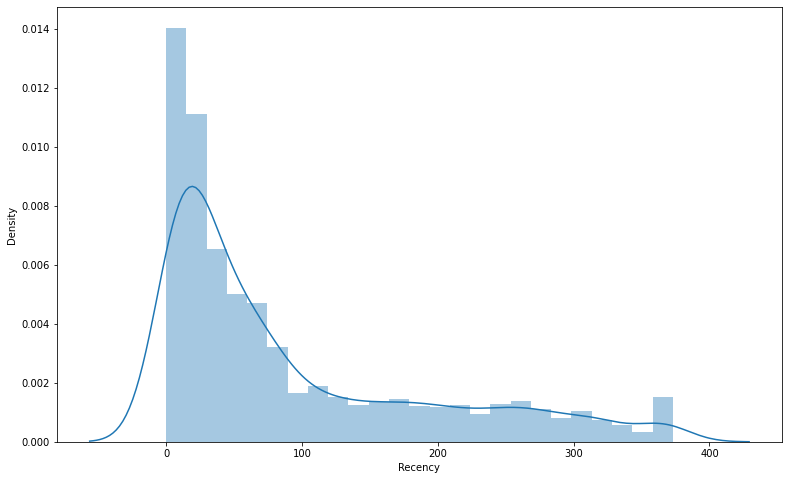

In [172]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [173]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    4339.000000
mean       90.512100
std       225.515328
min         1.000000
25%        17.000000
50%        41.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

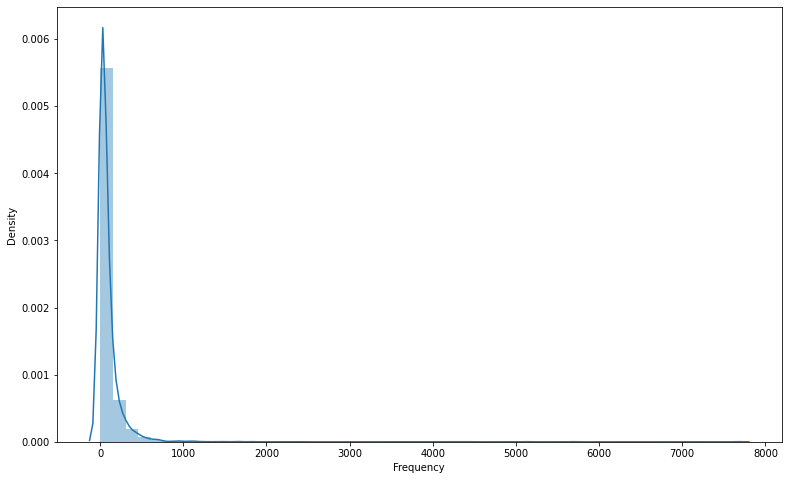

In [174]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [175]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: Monetary, dtype: float64

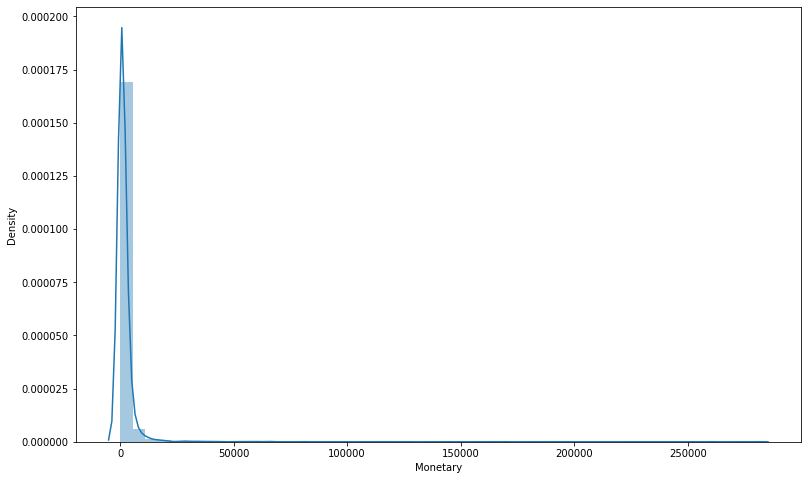

In [176]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

####**Split into four segments using quantiles**

In [177]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [178]:
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5}}

In [179]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [180]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [181]:

#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

In [182]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

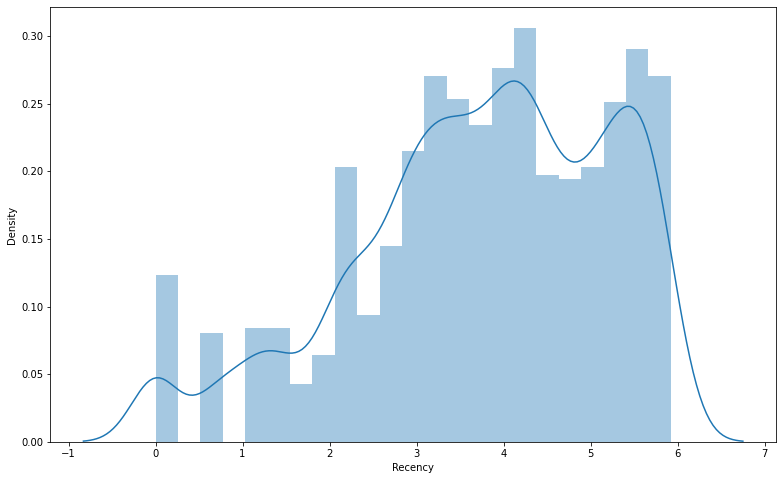

In [183]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

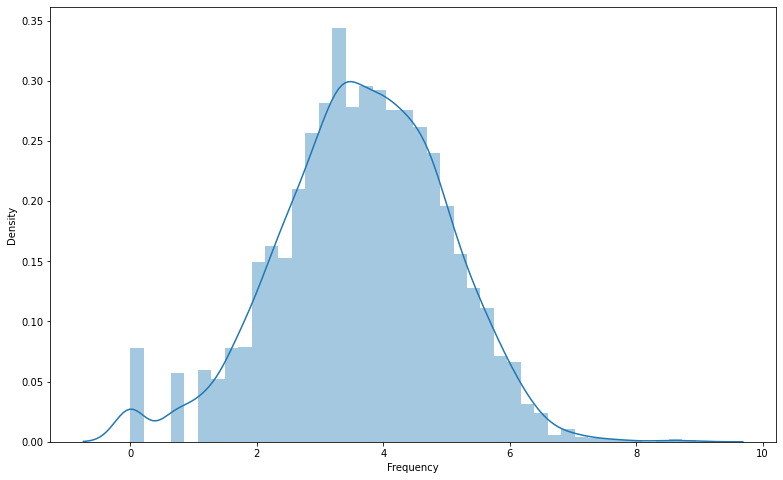

In [184]:

#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

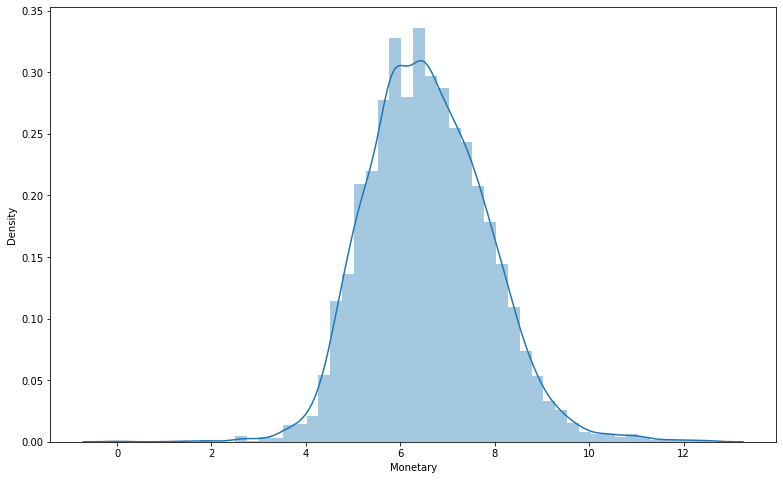

In [185]:

#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [186]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

#**K-Means Clustering**

***Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.***


***Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster***.

***The way kmeans algorithm works is as follows:***

1. ***Specify number of clusters K.***

2. ***Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.***

3. .***Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.***

4. .***Compute the sum of the squared distance between data points and all centroids..***

5. .***Assign each data point to the closest cluster (centroid)..***

6. .***Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster..***

.***The approach kmeans follows to solve the problem is called Expectation-Maximization. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster..***

###**Calculation of Silhouette score**

 ***Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:***

* *** Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.***
*  ***Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b***.

 ***The Silhouette Coefficient for a sample is*** $ S = \frac{(b - a)}{max(a, b)}$.

##**Applying Silhouette Score Method on Recency and Monetary**

In [187]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42047430853642515
For n_clusters = 3, silhouette score is 0.3420829164610086
For n_clusters = 4, silhouette score is 0.36471463504091317
For n_clusters = 5, silhouette score is 0.3368251173222108
For n_clusters = 6, silhouette score is 0.34397018052021067
For n_clusters = 7, silhouette score is 0.34735417704171834
For n_clusters = 8, silhouette score is 0.3382213977355589
For n_clusters = 9, silhouette score is 0.34563594558385463
For n_clusters = 10, silhouette score is 0.3472313772094089
For n_clusters = 11, silhouette score is 0.33718646945071834
For n_clusters = 12, silhouette score is 0.33675493520626576
For n_clusters = 13, silhouette score is 0.3393014832111602
For n_clusters = 14, silhouette score is 0.34319983516284336
For n_clusters = 15, silhouette score is 0.33785028858574856


### **Applying elbow method**

***Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. Let us see how this elbow method works. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance***.

***When the value of k is 1, the within-cluster sum of the square will be high. As the value of k increases, the within-cluster sum of square value will decrease***.

***Finally, we will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k***.

##**Applying Elbow Method on Recency and Monetary**


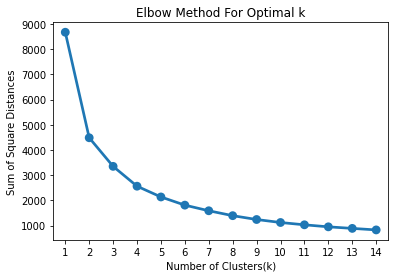

In [188]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [189]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

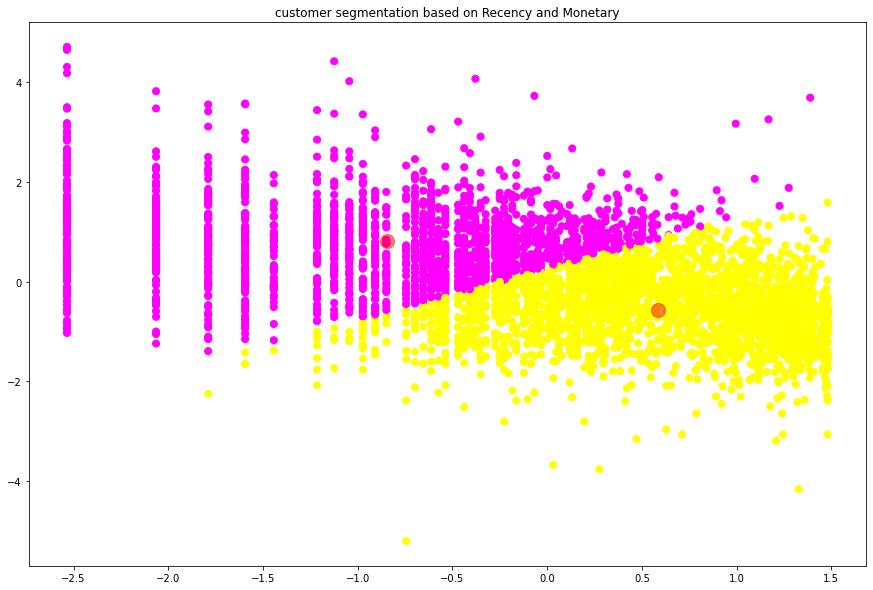

In [190]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* **we see that ,Customers are well separate when we cluster them by Recency and Monetary**

### **what is DBSCAN Clustering**

***Clustering analysis or simply Clustering is basically an Unsupervised learning method that divides the data points into a number of specific batches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense. It comprises many different methods based on differential evolution.*** 
***E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance) etc*** 

***Fundamentally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on Density-based spatial clustering of applications with noise (DBSCAN) clustering method***

##**Applying DBSCAN  on Recency and Monetary**

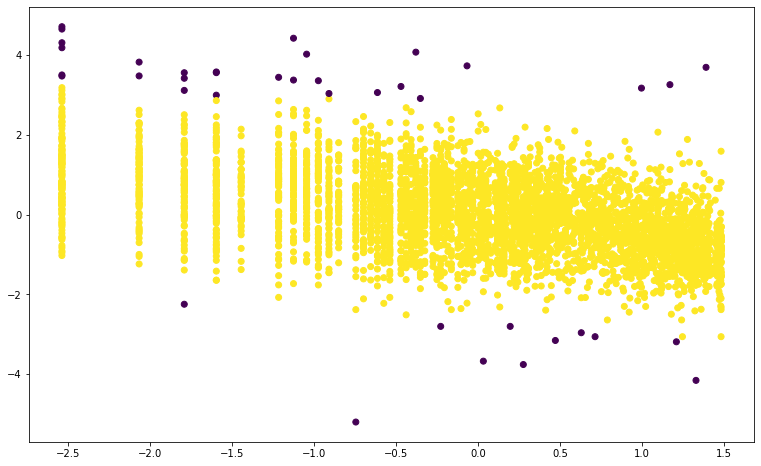

In [191]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* **we see that ,Customers are well separate when we cluster them by Recency and Monetary**

##**Applying silhouette Score  Method on Frquency and Monetary**

In [192]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.47845597520335387
For n_clusters = 3, silhouette score is 0.40773549715950697
For n_clusters = 4, silhouette score is 0.37192570288668064
For n_clusters = 5, silhouette score is 0.3477141084166106
For n_clusters = 6, silhouette score is 0.36241309948633027
For n_clusters = 7, silhouette score is 0.3389696098400802
For n_clusters = 8, silhouette score is 0.3490258927912719
For n_clusters = 9, silhouette score is 0.3462242429126417
For n_clusters = 10, silhouette score is 0.3442244341764981
For n_clusters = 11, silhouette score is 0.36732793946395265
For n_clusters = 12, silhouette score is 0.35478476668657266
For n_clusters = 13, silhouette score is 0.36290326107085463
For n_clusters = 14, silhouette score is 0.3533123810048288
For n_clusters = 15, silhouette score is 0.3467485482714369


##**Applying Elbow Method on Frequency and Monetary**


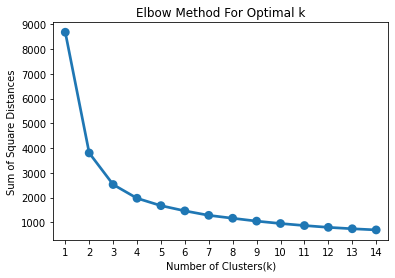

In [193]:

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [194]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

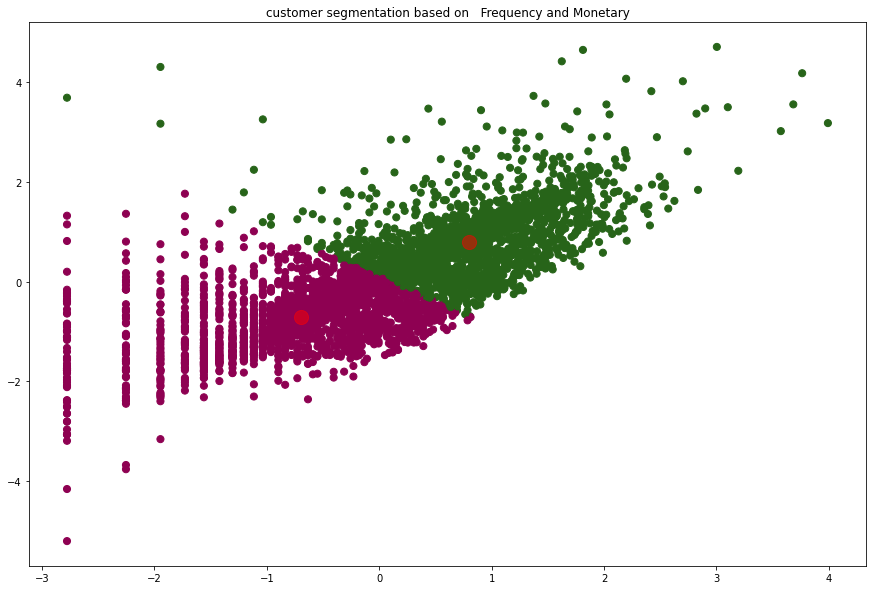

In [195]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* **we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

##**Applying DBSCAN to Method on Frquency and Monetary**

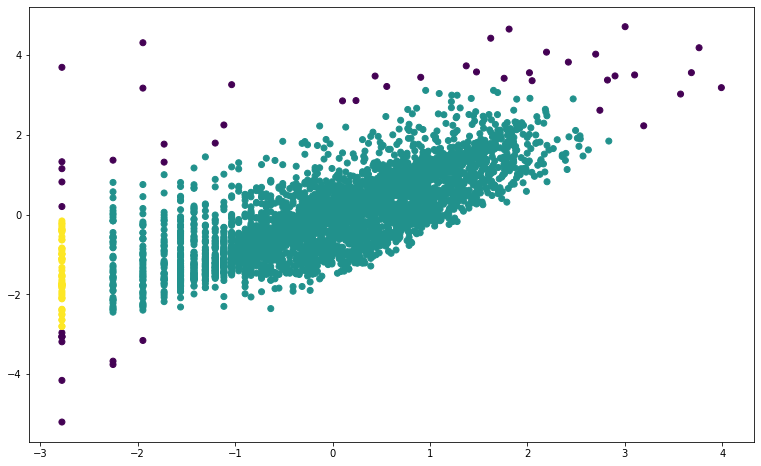

In [196]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* **we see that ,Customers are well separate when we cluster them by Frequency and Monetary**

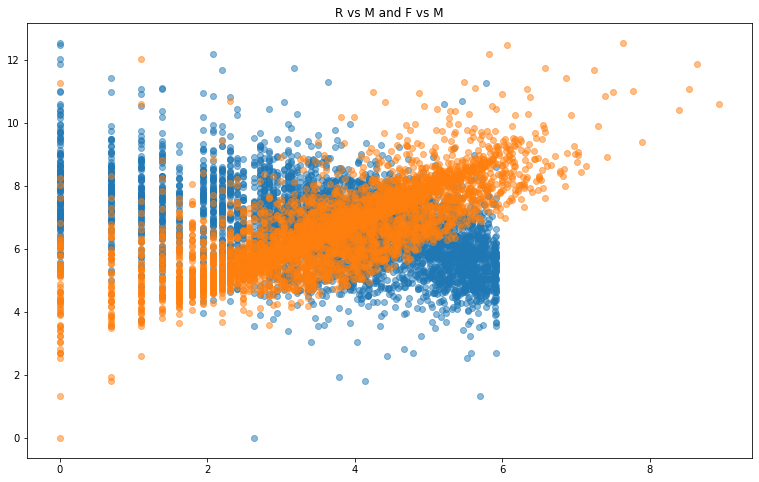

In [197]:
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

##**Applying Silhouette  Method on Recency ,Frequency and Monetary**

In [198]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.3953473255895671
For n_clusters = 3 The average silhouette_score is : 0.3056346992700891
For n_clusters = 4 The average silhouette_score is : 0.30270317426951315
For n_clusters = 5 The average silhouette_score is : 0.279287144278932
For n_clusters = 6 The average silhouette_score is : 0.2791427508121517
For n_clusters = 7 The average silhouette_score is : 0.2624688625487521
For n_clusters = 8 The average silhouette_score is : 0.2641439272039239
For n_clusters = 9 The average silhouette_score is : 0.25335269919725206
For n_clusters = 10 The average silhouette_score is : 0.25957414651642013
For n_clusters = 11 The average silhouette_score is : 0.26311930659289096
For n_clusters = 12 The average silhouette_score is : 0.2678852371616394
For n_clusters = 13 The average silhouette_score is : 0.2626637804897655
For n_clusters = 14 The average silhouette_score is : 0.26201930714854194
For n_clusters = 15 The average silhouette_score is : 0

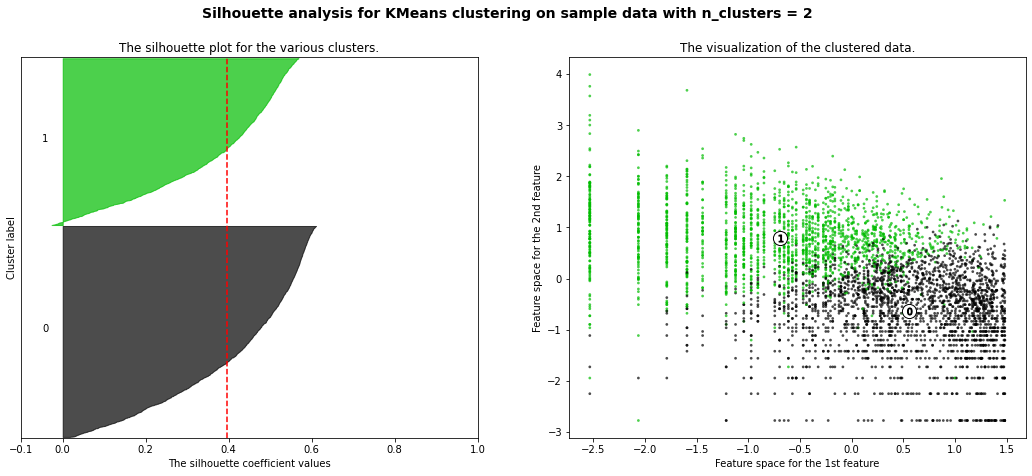

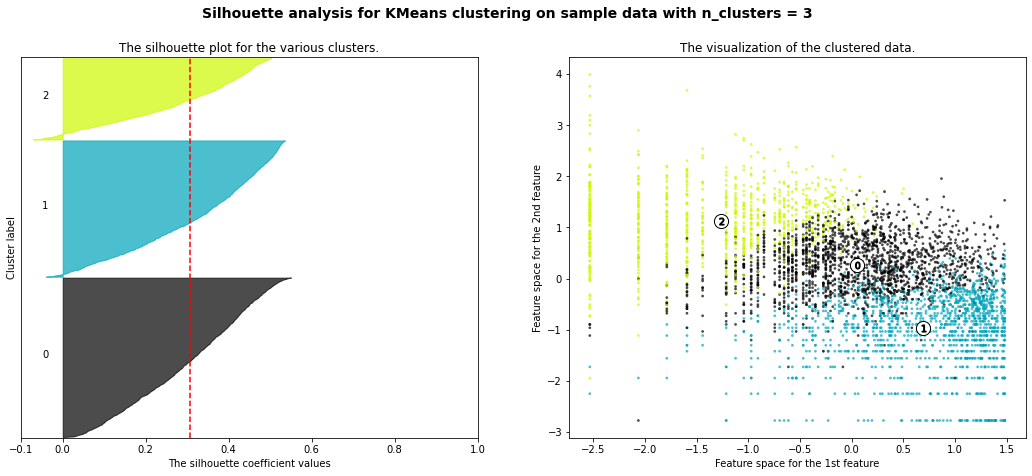

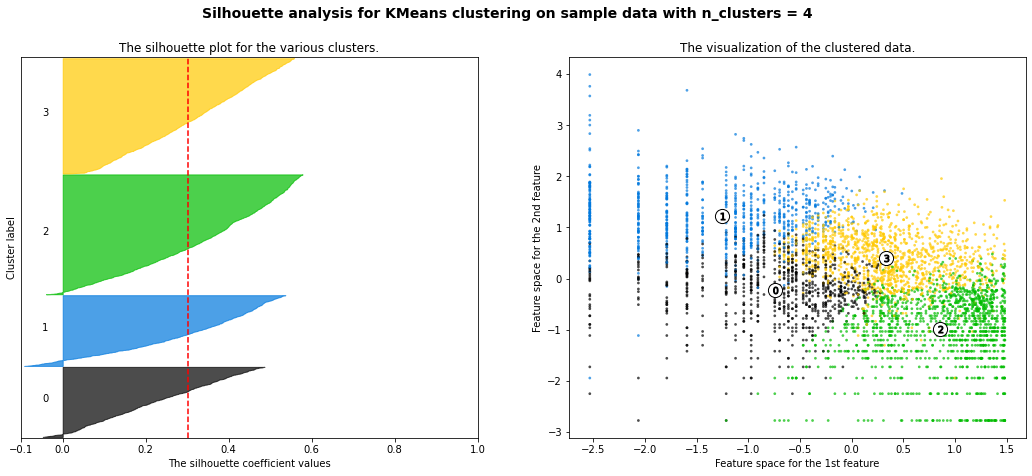

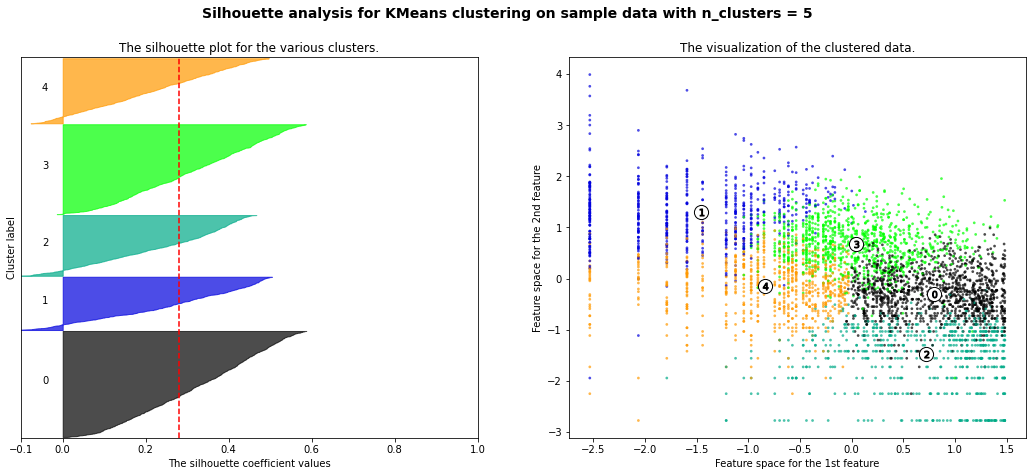

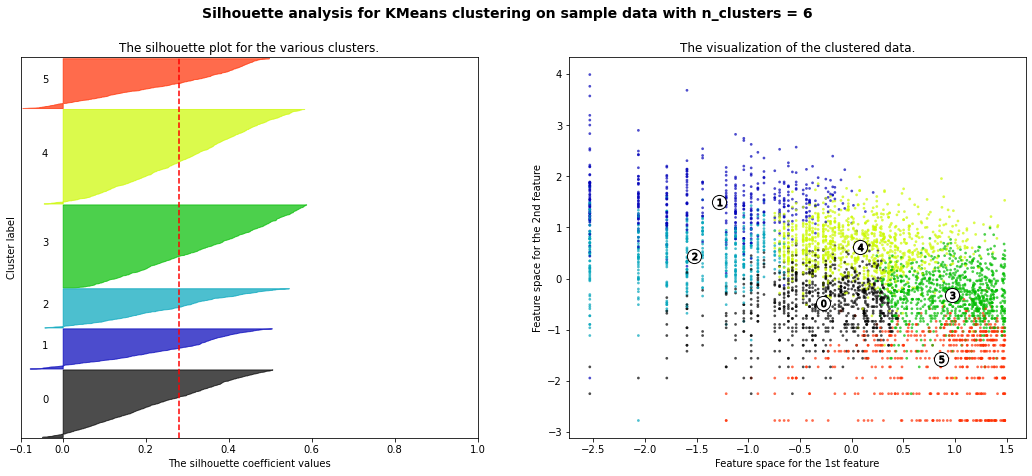

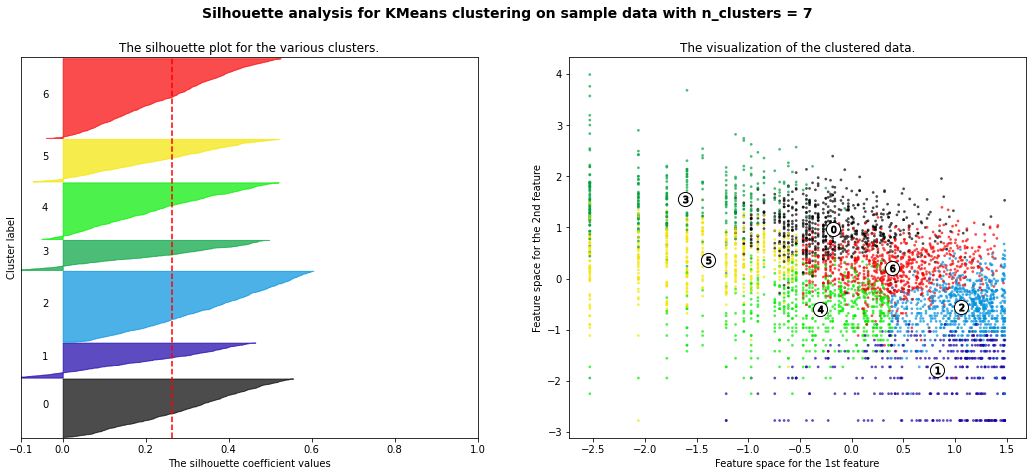

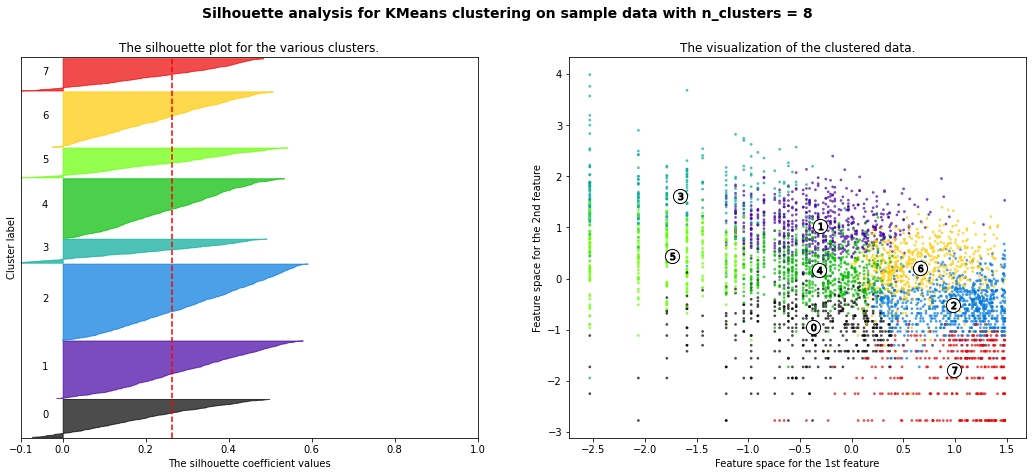

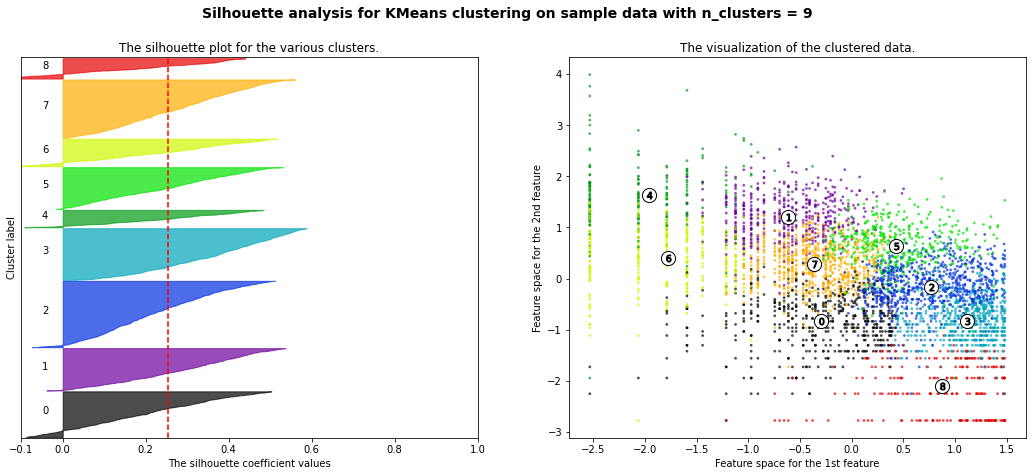

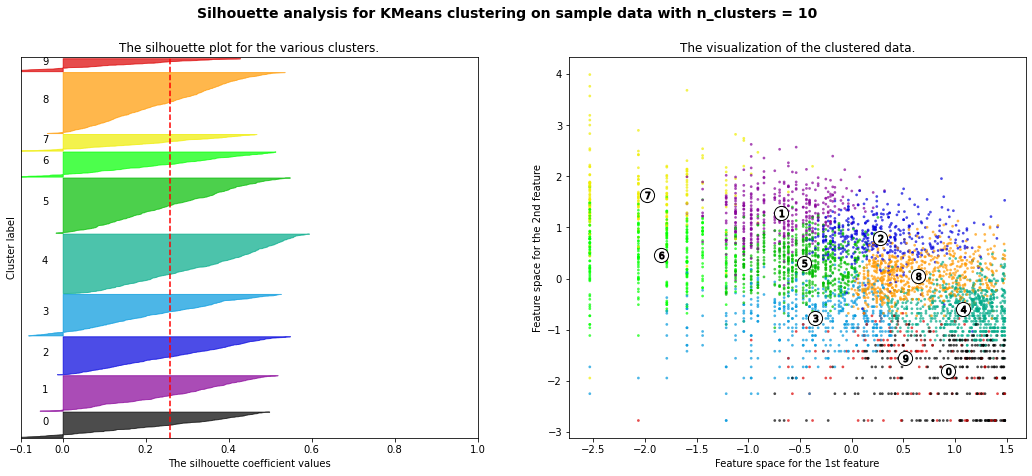

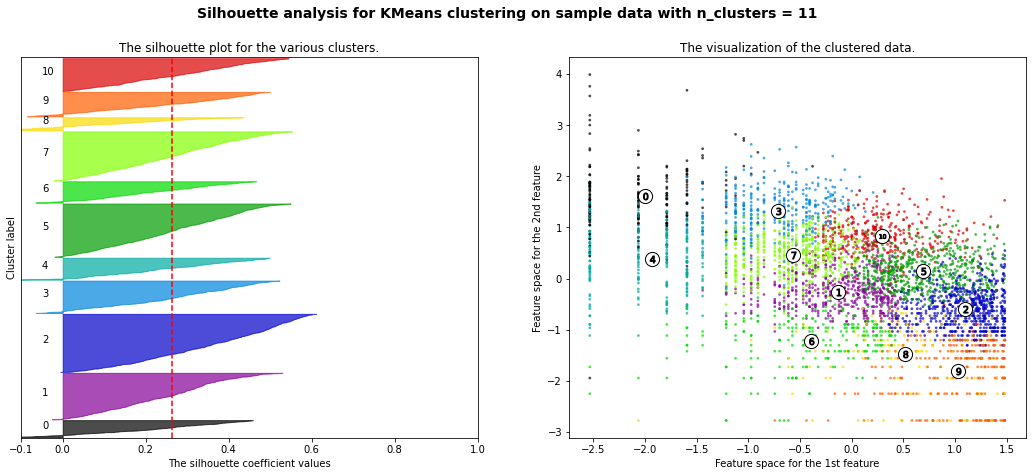

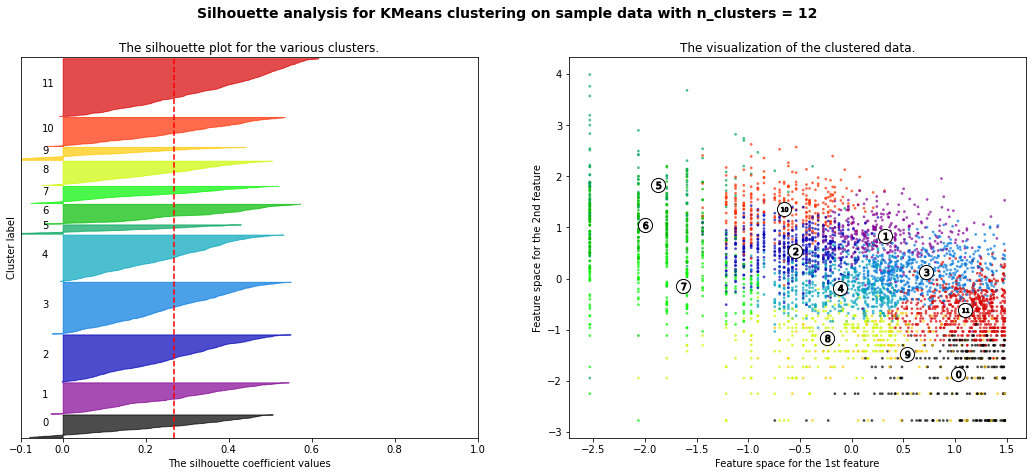

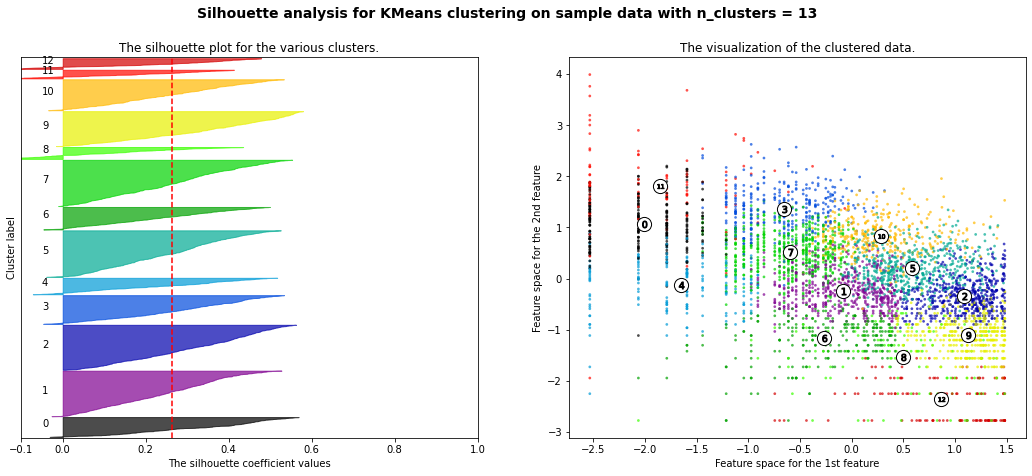

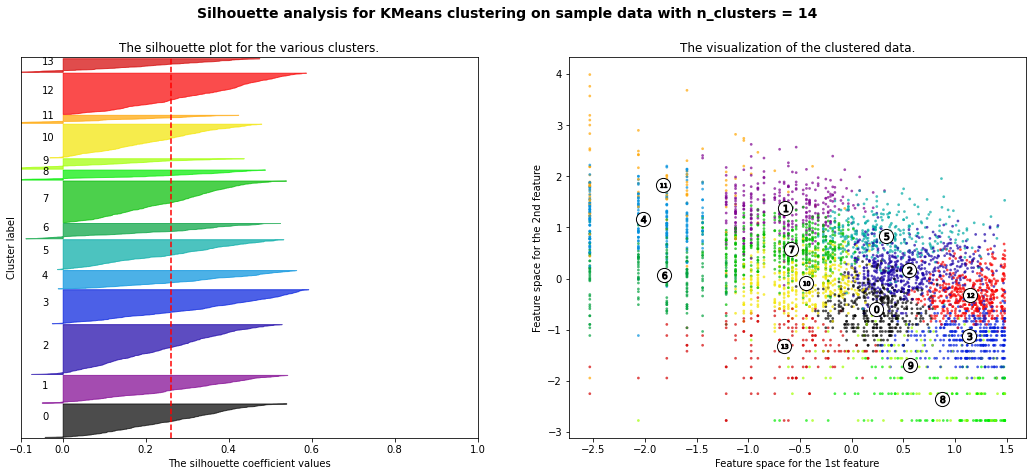

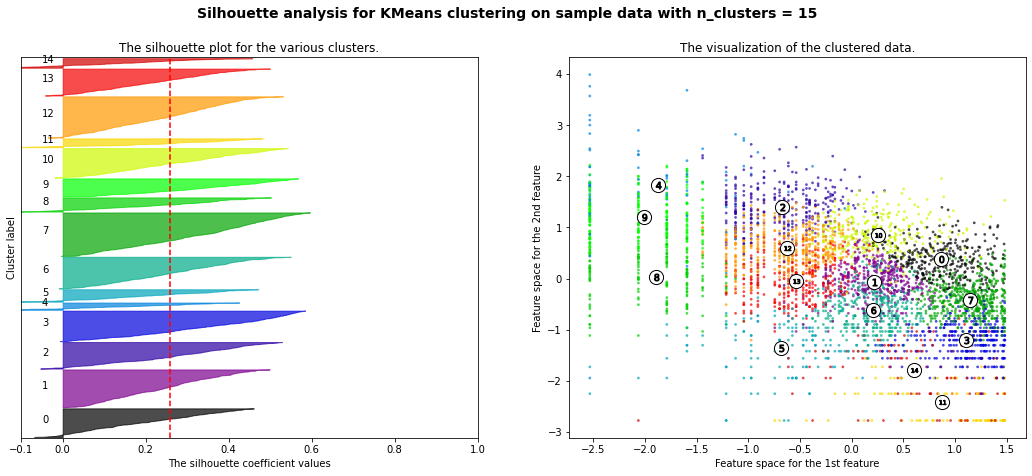

In [199]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [200]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

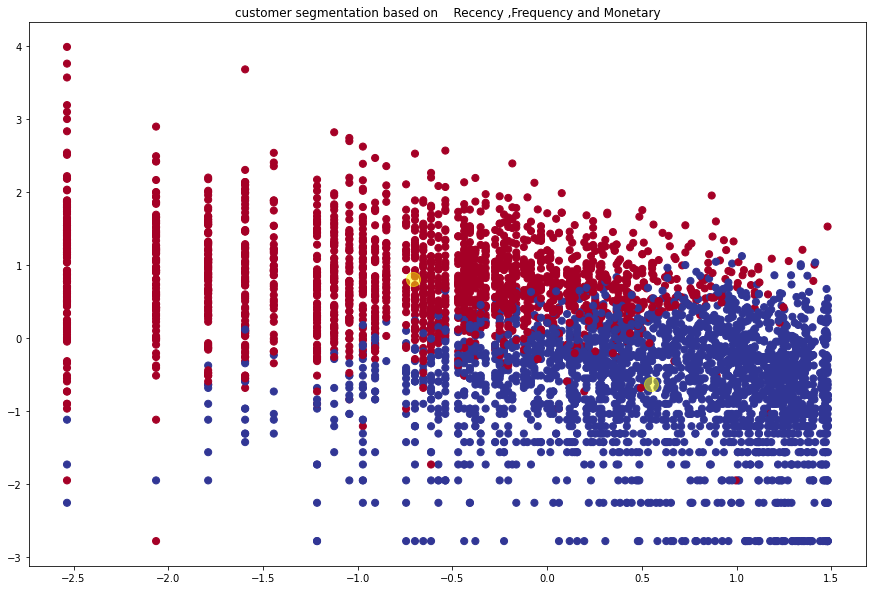

In [201]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

* **we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary**

##**Applying Elbow Method on Recency ,Frequency and Monetary**


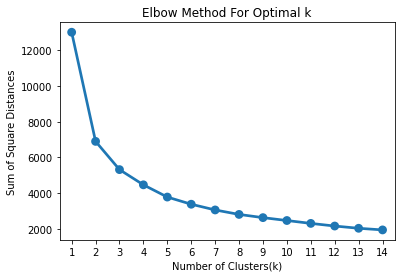

In [202]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [203]:

#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

Recency  Frequency  Monetary  ...  Frequency_log  Monetary_log  Cluster
CustomerID                                ...                                      
12346.0         325          1  77183.60  ...       0.000000     11.253942        0
12347.0           2        182   4310.00  ...       5.204007      8.368693        1
12348.0          75         31   1797.24  ...       3.433987      7.494007        0
12349.0          18         73   1757.55  ...       4.290459      7.471676        1
12350.0         310         17    334.40  ...       2.833213      5.812338        0
12352.0          36         85   2506.04  ...       4.442651      7.826459        1
12353.0         204          4     89.00  ...       1.386294      4.488636        0
12354.0         232         58   1079.40  ...       4.060443      6.984161        0
12355.0         214         13    459.40  ...       2.564949      6.129921        0
12356.0          22         59   2811.43  ...       4.077537      7.941449        1

[10 rows x 12 columns]

##**Dendogram to find the optimal number of clusters**

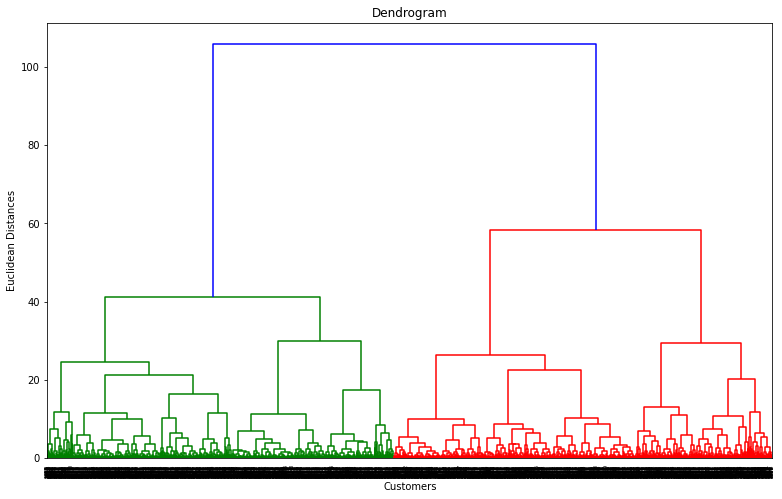

In [204]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

* **The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90**

* **No. of Cluster = 2**

In [205]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

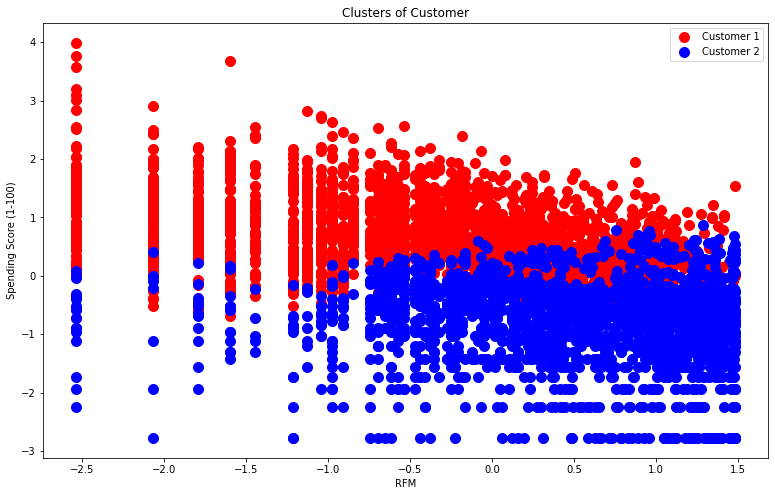

In [206]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

* **By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 2**

##**Applying DBSCAN to Recency ,Frequency and Monetary**

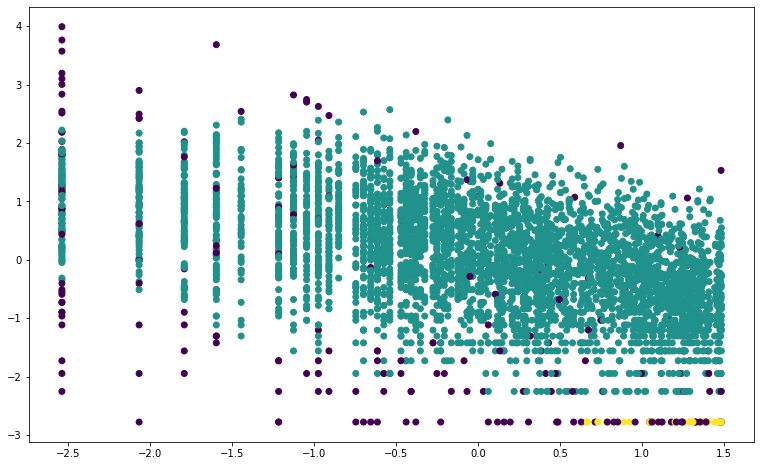

In [207]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

* **we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3**


#**Summary**

In [208]:

from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])
myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

# **Conclusion**

***Thats it! We have come to an end of this long exercise. Throughout the analysis we went through various steps to perform customer segmentation. We started with data wrangling in which we tried to handle null values, duplicates and performed feature modifications. Next, we did some exploratory data analysis and tried to draw observations from the features we had in the dataset.*** 

***Next, we formulated some quantitative factors such as recency, frequency and monetary known as rfm model for each of the customers. We implemented KMeans clustering algorithm on these features. We also performed silhouette and elbow method analysis to determine the optimal no. of clusters which was 2. We saw customers having high recency and low frequency and monetary values were part of one cluster and customers having low recency and high frequency, monetary values were part of another cluster***.


***However, there can be more modifications on this analysis. One may choose to cluster into more no. depending on company objectives and preferences. The labelled feature after clustering can be fed into classification supervised machine learning algorithms that could predict the classes for new set of observations. The clustering can also be performed on new set of features such as type of products each customer prefer to buy often, finding out customer lifetime value (clv), segmenting on the basis of time period they visit and much more***. 

***As machine learning has become more of an ART, there is nothing such as right or wrong. We only try to get the best outcomes that can suit our final objectives. There is, and always will be, a need to improve, going forward.***